In [2]:
import pandas as pd
import re
import numpy as np
import gzip
import json

In [3]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')



In [4]:
All_Beauty= getDF('All_Beauty.json.gz')

In [5]:
m_All_Beauty= getDF('meta_All_Beauty.json.gz')

In [6]:
m1_All_Beauty=m_All_Beauty.drop(['imageURL','imageURLHighRes', 'tech1', 'feature', 
                                  'similar_item', 'description', 'also_view', 'fit', 'also_buy', 'details'], axis=1)

In [7]:
m1_All_Beauty.columns

Index(['category', 'title', 'tech2', 'brand', 'rank', 'main_cat', 'date',
       'price', 'asin'],
      dtype='object')

In [8]:
df = pd.merge(All_Beauty, m_All_Beauty, on ='asin', how ='left')

In [9]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'details',
       'main_cat', 'similar_item', 'date', 'price', 'imageURL',
       'imageURLHighRes'],
      dtype='object')

In [10]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,1.0,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df=df.drop(["reviewerName","style","image", 'also_buy','also_view','category', 'description', 'details', 'feature', 'fit',
                    'imageURL','imageURLHighRes', 'main_cat','similar_item','tech1', 'tech2'], axis=1)

In [12]:
df.isna().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewText           404
summary              212
unixReviewTime         0
vote              332735
title               5122
brand               5122
rank                5122
date                5122
price               5122
dtype: int64

In [13]:
df=df.drop(["vote","verified"], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387654 entries, 0 to 387653
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         387654 non-null  float64
 1   reviewTime      387654 non-null  object 
 2   reviewerID      387654 non-null  object 
 3   asin            387654 non-null  object 
 4   reviewText      387250 non-null  object 
 5   summary         387442 non-null  object 
 6   unixReviewTime  387654 non-null  int64  
 7   title           382532 non-null  object 
 8   brand           382532 non-null  object 
 9   rank            382532 non-null  object 
 10  date            382532 non-null  object 
 11  price           382532 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 38.4+ MB


In [15]:
df

,overall,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime,title,brand,rank,date,price
0,1.0,"02 19, 2015",A1V6B6TNIC10QE,0143026860,great,One Star,1424304000,NaN,NaN,NaN,NaN,NaN
1,4.0,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN,NaN,NaN
2,4.0,"08 10, 2014",A1572GUYS7DGSR,0143026860,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN,NaN,NaN
3,5.0,"03 11, 2013",A1PSGLFK1NSVO,0143026860,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN,NaN,NaN
4,5.0,"12 25, 2011",A6IKXKZMTKGSC,0143026860,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
387649,1.0,"07 20, 2017",A202DCI7TV1022,B01HJEGTYK,It was awful. It was super frizzy and I tried ...,It was super frizzy and I tried to comb it and...,1500508800,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,,"478,123 in Beauty & Personal Care (",,
387650,5.0,"03 16, 2017",A3FSOR5IJOFIBE,B01HJEGTYK,I was skeptical about buying this. Worried it...,Awesome,1489622400,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,,"478,123 in Beauty & Personal Care (",,
387651,5.0,"03 1, 2017",A1B5DK6CTP2P24,B01HJEGTYK,Makes me look good fast.,Five Stars,1488326400,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,,"478,123 in Beauty & Personal Care (",,
387652,2.0,"02 21, 2017",A23OUYS5IRMJS9,B01HJEGTYK,Way lighter than photo\nNot mix blend of color...,Ok but color way off and volume as well,1487635200,FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...,,"478,123 in Beauty & Personal Care (",,


In [16]:
len(df['reviewText'].unique())

319644

In [17]:
df['uniqueID'] = df['reviewerID'] + df['asin'] + df['unixReviewTime'].astype(str)

In [18]:
df.head()

,overall,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime,title,brand,rank,date,price,uniqueID
0,1.0,"02 19, 2015",A1V6B6TNIC10QE,0143026860,great,One Star,1424304000,NaN,NaN,NaN,NaN,NaN,A1V6B6TNIC10QE01430268601424304000
1,4.0,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN,NaN,NaN,A2F5GHSXFQ0W6J01430268601418860800
2,4.0,"08 10, 2014",A1572GUYS7DGSR,0143026860,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN,NaN,NaN,A1572GUYS7DGSR01430268601407628800
3,5.0,"03 11, 2013",A1PSGLFK1NSVO,0143026860,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN,NaN,NaN,A1PSGLFK1NSVO01430268601362960000
4,5.0,"12 25, 2011",A6IKXKZMTKGSC,0143026860,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,NaN,NaN,NaN,NaN,NaN,A6IKXKZMTKGSC01430268601324771200


In [19]:
df1=df.drop_duplicates(subset=['uniqueID'], keep='last')

In [20]:
df1.columns

Index(['overall', 'reviewTime', 'reviewerID', 'asin', 'reviewText', 'summary',
       'unixReviewTime', 'title', 'brand', 'rank', 'date', 'price',
       'uniqueID'],
      dtype='object')

In [21]:
df2= df1.drop(['overall', 'reviewTime', 'reviewerID', 'asin', 'summary',
       'unixReviewTime', 'title', 'brand', 'rank', 'date', 'price'], axis=1)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362201 entries, 0 to 387653
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reviewText  361806 non-null  object
 1   uniqueID    362201 non-null  object
dtypes: object(2)
memory usage: 8.3+ MB


In [23]:
df2 = df2[~df2.reviewText.isna()]

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361806 entries, 0 to 387653
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reviewText  361806 non-null  object
 1   uniqueID    361806 non-null  object
dtypes: object(2)
memory usage: 8.3+ MB


In [25]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df2['Cleaned Reviews'] = df2['reviewText'].apply(clean)
df2.head()

,reviewText,uniqueID,Cleaned Reviews
0,great,A1V6B6TNIC10QE01430268601424304000,great
1,My husband wanted to reading about the Negro ...,A2F5GHSXFQ0W6J01430268601418860800,My husband wanted to reading about the Negro B...
2,"This book was very informative, covering all a...",A1572GUYS7DGSR01430268601407628800,This book was very informative covering all as...
3,I am already a baseball fan and knew a bit abo...,A1PSGLFK1NSVO01430268601362960000,I am already a baseball fan and knew a bit abo...
4,This was a good story of the Black leagues. I ...,A6IKXKZMTKGSC01430268601324771200,This was a good story of the Black leagues I b...


In [26]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adhirajsrivastava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adhirajsrivastava/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adhirajsrivastava/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
import nltk
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/adhirajsrivastava/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/adhirajsrivastava/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [28]:
%%time
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df2['POS tagged'] = df2['Cleaned Reviews'].apply(token_stop_pos)
df2.head()

CPU times: user 23min 21s, sys: 1min 52s, total: 25min 14s
Wall time: 25min 16s


,reviewText,uniqueID,Cleaned Reviews,POS tagged
0,great,A1V6B6TNIC10QE01430268601424304000,great,"[(great, a)]"
1,My husband wanted to reading about the Negro ...,A2F5GHSXFQ0W6J01430268601418860800,My husband wanted to reading about the Negro B...,"[(husband, n), (wanted, v), (reading, v), (Neg..."
2,"This book was very informative, covering all a...",A1572GUYS7DGSR01430268601407628800,This book was very informative covering all as...,"[(book, n), (informative, a), (covering, v), (..."
3,I am already a baseball fan and knew a bit abo...,A1PSGLFK1NSVO01430268601362960000,I am already a baseball fan and knew a bit abo...,"[(already, r), (baseball, n), (fan, n), (knew,..."
4,This was a good story of the Black leagues. I ...,A6IKXKZMTKGSC01430268601324771200,This was a good story of the Black leagues I b...,"[(good, a), (story, n), (Black, n), (leagues, ..."


In [29]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [30]:
%%time
df2['lemma'] = df2['POS tagged'].apply(lemmatize)
df2.head()

CPU times: user 17.7 s, sys: 91.8 ms, total: 17.8 s
Wall time: 17.8 s


,reviewText,uniqueID,Cleaned Reviews,POS tagged,lemma
0,great,A1V6B6TNIC10QE01430268601424304000,great,"[(great, a)]",great
1,My husband wanted to reading about the Negro ...,A2F5GHSXFQ0W6J01430268601418860800,My husband wanted to reading about the Negro B...,"[(husband, n), (wanted, v), (reading, v), (Neg...",husband want read Negro Baseball great addit...
2,"This book was very informative, covering all a...",A1572GUYS7DGSR01430268601407628800,This book was very informative covering all as...,"[(book, n), (informative, a), (covering, v), (...",book informative cover aspect game
3,I am already a baseball fan and knew a bit abo...,A1PSGLFK1NSVO01430268601362960000,I am already a baseball fan and knew a bit abo...,"[(already, r), (baseball, n), (fan, n), (knew,...",already baseball fan know bit Negro league l...
4,This was a good story of the Black leagues. I ...,A6IKXKZMTKGSC01430268601324771200,This was a good story of the Black leagues I b...,"[(good, a), (story, n), (Black, n), (leagues, ...",good story Black league buy book teach high ...


In [31]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [32]:
%%time
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
df2['Polarity'] = df2['lemma'].apply(getPolarity) 
df2['Analysis'] = df2['Polarity'].apply(analysis)
df2.head()

CPU times: user 40.5 s, sys: 91.5 ms, total: 40.6 s
Wall time: 40.6 s


,reviewText,uniqueID,Cleaned Reviews,POS tagged,lemma,Polarity,Analysis
0,great,A1V6B6TNIC10QE01430268601424304000,great,"[(great, a)]",great,0.800000,Positive
1,My husband wanted to reading about the Negro ...,A2F5GHSXFQ0W6J01430268601418860800,My husband wanted to reading about the Negro B...,"[(husband, n), (wanted, v), (reading, v), (Neg...",husband want read Negro Baseball great addit...,0.800000,Positive
2,"This book was very informative, covering all a...",A1572GUYS7DGSR01430268601407628800,This book was very informative covering all as...,"[(book, n), (informative, a), (covering, v), (...",book informative cover aspect game,-0.400000,Negative
3,I am already a baseball fan and knew a bit abo...,A1PSGLFK1NSVO01430268601362960000,I am already a baseball fan and knew a bit abo...,"[(already, r), (baseball, n), (fan, n), (knew,...",already baseball fan know bit Negro league l...,0.000000,Neutral
4,This was a good story of the Black leagues. I ...,A6IKXKZMTKGSC01430268601324771200,This was a good story of the Black leagues I b...,"[(good, a), (story, n), (Black, n), (leagues, ...",good story Black league buy book teach high ...,0.237667,Positive


In [33]:
df3 = df2.drop(["reviewText", "Cleaned Reviews", "POS tagged", "lemma", "Polarity"], axis = 1)

In [34]:
df3

,uniqueID,Analysis
0,A1V6B6TNIC10QE01430268601424304000,Positive
1,A2F5GHSXFQ0W6J01430268601418860800,Positive
2,A1572GUYS7DGSR01430268601407628800,Negative
3,A1PSGLFK1NSVO01430268601362960000,Neutral
4,A6IKXKZMTKGSC01430268601324771200,Positive
...,...,...
387649,A202DCI7TV1022B01HJEGTYK1500508800,Negative
387650,A3FSOR5IJOFIBEB01HJEGTYK1489622400,Negative
387651,A1B5DK6CTP2P24B01HJEGTYK1488326400,Positive
387652,A23OUYS5IRMJS9B01HJEGTYK1487635200,Positive


In [35]:
df3 = pd.merge(df1, df3, on ='uniqueID', how ='left')

In [36]:
df3['Positive'] = np.where(df3['Analysis']== 'Positive', 1, 0)
df3['Negative'] = np.where(df3['Analysis']== 'Negative', 1, 0)
df3['Neutral'] = np.where(df3['Analysis']== 'Neutral', 1, 0)

In [37]:
df4 = df3.groupby('asin').sum()

In [38]:
df4.sort_values(by = ["Positive", "Negative"], ascending = False)

,overall,unixReviewTime,Positive,Negative,Neutral
asin,,,,,
B000FOI48G,38086.0,11842459286400,7463,705,498
B000GLRREU,36743.0,11388780230400,7205,671,464
1620213982,22994.0,6951217651200,4248,217,324
B001QY8QXM,20693.0,6583760956800,3858,461,223
B01DKQAXC0,17867.0,6357611808000,3590,423,229
...,...,...,...,...,...
B01HDPGG9I,5.0,1477440000,0,0,1
B01HFHOWS6,1.0,1498780800,0,0,1
B01HFVRT0U,5.0,1492473600,0,0,1


In [39]:
import datetime
import matplotlib.pyplot as plt

def pos_neg_timeline(x):
    data = df3[df3["asin"] == x]
    data = data[["asin", "unixReviewTime","Analysis", "Positive", "Negative", "Neutral"]]
    data["date"] = pd.to_datetime(data["unixReviewTime"], unit = "s")
    data['month'] = pd.DatetimeIndex(data['date']).month
    data['year'] = pd.DatetimeIndex(data['date']).year
    data = data.groupby(["year", "month"], as_index = False).sum()
    data = data.sort_values(by = ["year", "month"])
    data["year-month"] = data["year"].astype(str) + data["month"].astype(str)
    
    timeperiods = data.index.values

    fig, ax = plt.subplots(figsize = (17,9), dpi = 70)

    ax.plot(data["Positive"], linewidth = 2, color = "#32a852")
    ax.set_facecolor("#e6faeb")
    ax.plot(data["Negative"], linewidth = 2, color = "red")
    ax.set_facecolor("#e1f7f5")
    
    ax.set_xticks(np.arange(0,data["Positive"].count(),4));
    ax.set_xticks(np.arange(0,data["Positive"].count(),4));
    ax.set_xticklabels(data["year-month"].values[::4], rotation = 45);
    ax.set_xticklabels(data["year-month"].values[::4], rotation = 45);
        
    
    ax.set_title("Timeline of Positive reviews", fontweight = "bold", fontsize = 15)
    ax.set_title("Timeline of Negative reviews", fontweight = "bold", fontsize = 15)
    plt.tight_layout()

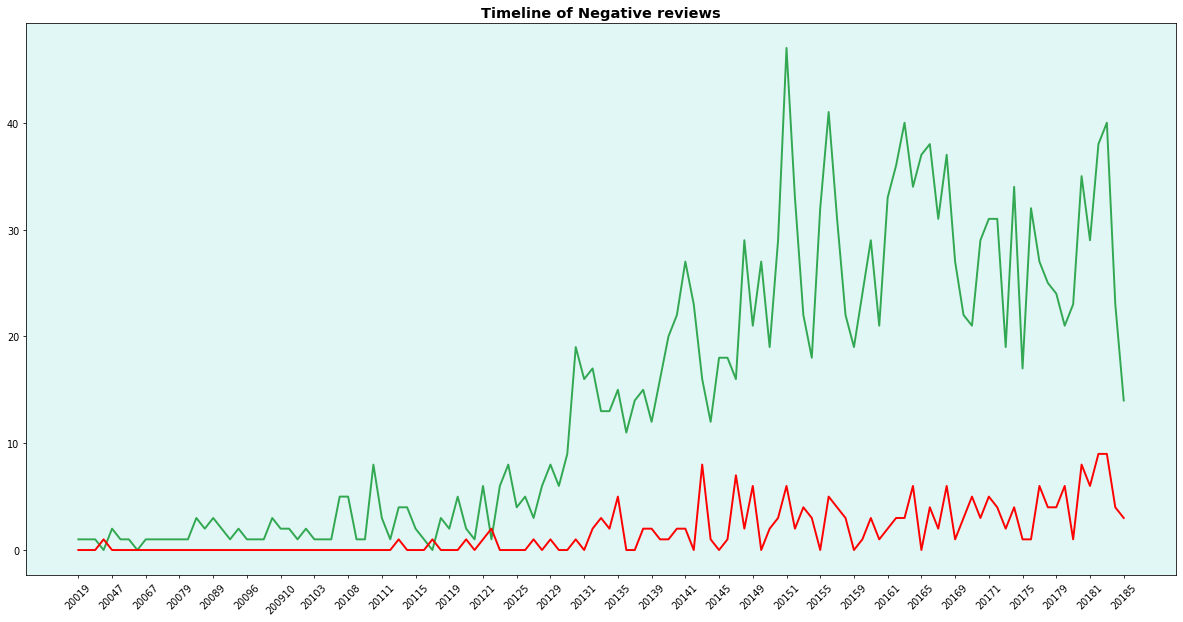

In [46]:
pos_neg_timeline("B00005JS5C")

In [42]:
df5 = df3.groupby('overall').sum()